In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression  #import
from sklearn import feature_selection
%matplotlib inline

In [57]:
ClassData = pd.read_csv('admissions.csv')

In [86]:
#Number of observations
ClassData.describe()

,admit,gre,gpa,prestige,gpa_admit
count,400.000000,400.000000,400.000000,400.00000,400.000000
mean,0.317500,588.040201,3.390930,2.48500,1.107577
std,0.466087,115.338353,0.379675,0.94446,1.639173
min,0.000000,220.000000,2.260000,1.00000,0.000000
25%,0.000000,520.000000,3.130000,2.00000,0.000000
50%,0.000000,580.000000,3.390930,2.00000,0.000000
75%,1.000000,660.000000,3.670000,3.00000,3.172500
max,1.000000,800.000000,4.000000,4.00000,4.000000


The above table indicates that approximately 31% of students were admitted to colleges of choice
It seems that in between 50% and 75% of people were not admitted to colleges. The gre score for seems to hover somewhere around 520 and 660 for the majority of students. GPA also seems to be between 3.13 an 3.67, It seems that most of the applicants applied at a Graduate school from a prestige between 2 and 3.

In [97]:
admitted = ClassData["admit"] == 1
percent_admitted = float(ClassData[admitted]["admit"].count()) /ClassData["admit"].count()
print (percent_admitted)
for i in range(1,5):
    prestige = ClassData["prestige"] == i
    percent_admitted = float(ClassData[admitted & prestige]["admit"].count()) /ClassData[prestige]["admit"].count()
    print("%s Percent Admitted by prestige %d" % (percent_admitted, i))

0.3175
0.540983606557 Percent Admitted by prestige 1
0.35761589404 Percent Admitted by prestige 2
0.231404958678 Percent Admitted by prestige 3
0.179104477612 Percent Admitted by prestige 4


In [59]:
#Setting average for missing Values
gre = pd.isnull(ClassData["gre"]) == True
gre_mean = ClassData["gre"].mean()
print gre_mean
print ClassData[gre]
ClassData.loc[gre, "gre"] = gre_mean

gpa = pd.isnull(ClassData["gpa"]) == True
gpa_mean = ClassData["gpa"].mean()
ClassData.loc[gpa, "gpa"] = gpa_mean

prestige = pd.isnull(ClassData["prestige"]) == True
prestige_mean = ClassData["prestige"].mean()
ClassData.loc[prestige, "prestige"] = int(prestige_mean)

588.040201005
     admit  gre   gpa  prestige
187      0  NaN   NaN         2
212      0  NaN  2.87         2


In [118]:
def adjusted_r2(X, y, r2):
    obs = len(X)
    variable_count = len(X.columns)
    adj_r2 = 1 - (((1 - r2)*(obs - 1))/(obs - variable_count - 1))
    return adj_r2

def get_linear_model_metrics(X, y, algo):
    # get the pvalue of X given y. 
    pvals = feature_selection.f_regression(X, y)[1]
    algo.fit(X,y)
    residuals = (y-algo.predict(X))

    # print the necessary values
    print 'P Values:', pvals
    print 'Coefficients:', algo.coef_
    print 'y-intercept:', algo.intercept_
    print 'R-Squared:', algo.score(X,y)
    print 'Adjusted R-Squared:', adjusted_r2(X,y, algo.score(X, y))
    plt.figure()
    plt.hist(residuals)
    # keep the model
    return algo

ClassData.corr()

,admit,gre,gpa,prestige,gpa_admit
admit,1.000000,0.182705,0.175376,-0.242513,0.991910
gre,0.182705,1.000000,0.381311,-0.125156,0.196835
gpa,0.175376,0.381311,1.000000,-0.058992,0.243527
prestige,-0.242513,-0.125156,-0.058992,1.000000,-0.243255
gpa_admit,0.991910,0.196835,0.243527,-0.243255,1.000000


TypeError: 'Series' objects are mutable, thus they cannot be hashed

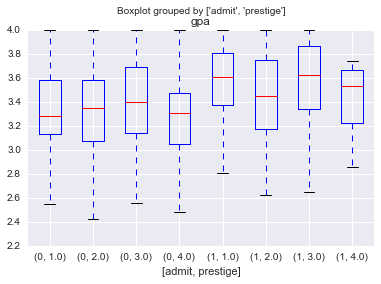

In [175]:
#adding dummy variables for prestige
#del ClassData["prestige_low"]
high = ClassData["prestige"] == 4
ClassData["prestige_high"] = 0
ClassData.loc[high, "prestige_high"] = 1

middle = ClassData["prestige"] == 3
ClassData["prestige_middle"] = 0
ClassData.loc[middle, "prestige_middle"] = 1

low = ClassData["prestige"] == 2
ClassData["prestige_low"] = 0
ClassData.loc[low, "prestige_low"] = 1

ClassData.boxplot(column="gpa", by=["admit", "prestige"])

q1_gpa = ClassData["gpa"].quantile(.25)
q2_gpa = ClassData["gpa"].quantile(.50)
q3_gpa = ClassData["gpa"].quantile(.75)
q4_gpa = ClassData["gpa"].quantile(1)
ClassData["q2_gpa"] = 0
ClassData[(ClassData["gpa"] >= q1_gpa) & (ClassData["gpa"] < q2_gpa), ""] = 1

In [180]:
q1_gpa = ClassData["gpa"].quantile(.25)
q2_gpa = ClassData["gpa"].quantile(.50)
q3_gpa = ClassData["gpa"].quantile(.75)
q4_gpa = ClassData["gpa"].quantile(1)
ClassData["q2_gpa"] = 0
gpa_low = (ClassData["gpa"] > q1_gpa) & (ClassData["gpa"] <= q2_gpa)
gpa_mid = (ClassData["gpa"] > q2_gpa) & (ClassData["gpa"] <= q3_gpa)
gpa_high = (ClassData["gpa"] > q3_gpa) & (ClassData["gpa"] <= q4_gpa)
ClassData["q2_gpa"] = 0
ClassData.loc[gpa_low, "q2_gpa"] = 1
ClassData["q3_gpa"] = 0
ClassData.loc[gpa_mid, "q3_gpa"] = 1
ClassData["q4_gpa"] = 0
ClassData.loc[gpa_high, "q4_gpa"] = 1

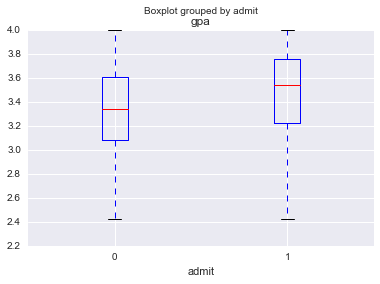

In [189]:
X = ClassData[["gre"]]
y = ClassData["admit"]
#linreg = LinearRegression()
#get_linear_model_metrics(X, y, linreg)
#linreg.predict([800])

ClassData.boxplot(column="gpa", by="admit")

In [167]:
ClassData[ClassData["gpa"] < 2.7].describe()


,admit,gre,gpa,prestige,gpa_admit,prestige_high,prestige_middle,prestige_low
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.333333,490.666667,2.562667,2.400000,0.869333,0.133333,0.266667,0.466667
std,0.487950,79.234432,0.123315,0.910259,1.273872,0.351866,0.457738,0.516398
min,0.000000,360.000000,2.260000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,430.000000,2.500000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,480.000000,2.620000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,540.000000,2.660000,3.000000,2.520000,0.000000,0.500000,1.000000
max,1.000000,680.000000,2.690000,4.000000,2.680000,1.000000,1.000000,1.000000


In [50]:
ClassData.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182705,0.175376,-0.241355
gre,0.182705,1.000000,0.381311,-0.124453
gpa,0.175376,0.381311,1.000000,-0.059011
prestige,-0.241355,-0.124453,-0.059011,1.000000
